In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [11]:
my_data_dir = r'G:\My_projects\Pose_estimation\data_four_poses'

In [12]:
os.listdir(my_data_dir) 

['test', 'train']

In [13]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [14]:
os.listdir(test_path)

['abnormal', 'normal']

In [15]:
os.listdir(train_path)

['abnormal', 'normal']

In [16]:
os.listdir(train_path+'\\normal')[0]

'Image0.png'

In [17]:
stick_figure = train_path+'\\normal'+'\\Image0.png'

In [18]:
stick_fig_img = imread(stick_figure)

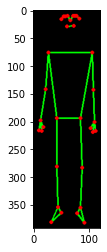

In [19]:
plt.imshow(stick_fig_img)

In [20]:
stick_fig_img.shape

(392, 121, 3)

In [22]:
len(os.listdir(train_path+'\\normal'))

781

In [23]:
len(os.listdir(train_path+'\\abnormal'))

760

In [24]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\normal'):
    
    img = imread(test_path+'\\normal'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

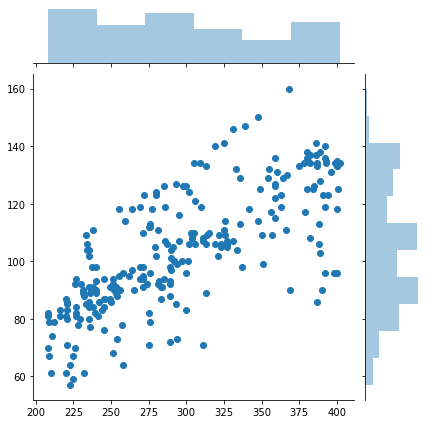

In [25]:
sns.jointplot(dim1,dim2)

In [26]:
np.mean(dim1)

298.2048192771084

In [27]:
np.mean(dim2)

103.8273092369478

In [30]:
image_shape = (300,105,3)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
image_gen = ImageDataGenerator(rotation_range=0, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

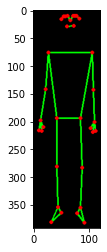

In [34]:
plt.imshow(stick_fig_img)

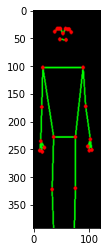

In [35]:
plt.imshow(image_gen.random_transform(stick_fig_img))

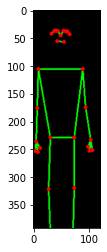

In [36]:
plt.imshow(image_gen.random_transform(stick_fig_img))

In [37]:
image_gen.flow_from_directory(train_path)

Found 1541 images belonging to 2 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 583 images belonging to 2 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [42]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 103, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 51, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 49, 64)       18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24640)            

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
batch_size = 16

In [47]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1541 images belonging to 2 classes.


In [48]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 583 images belonging to 2 classes.


In [49]:
train_image_gen.class_indices

{'abnormal': 0, 'normal': 1}

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
97/97 [==============================] - 55s 570ms/step - loss: 0.3499 - acc: 0.8566 - val_loss: 0.2486 - val_acc: 0.9091
Epoch 2/20
97/97 [==============================] - 54s 557ms/step - loss: 0.2453 - acc: 0.9007 - val_loss: 0.1597 - val_acc: 0.9348
Epoch 3/20
97/97 [==============================] - 55s 564ms/step - loss: 0.1976 - acc: 0.9215 - val_loss: 0.1442 - val_acc: 0.9451
Epoch 4/20
97/97 [==============================] - 54s 558ms/step - loss: 0.1493 - acc: 0.9442 - val_loss: 0.1814 - val_acc: 0.9177
Epoch 5/20
97/97 [==============================] - 53s 548ms/step - loss: 0.1382 - acc: 0.9539 - val_loss: 0.1372 - val_acc: 0.9485
Epoch 6/20
97/97 [==============================] - 53s 550ms/step - loss: 0.1313 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.9571
Epoch 7/20
97/97 [==============================] - 53s 550ms/step - loss: 0.1072 - acc: 0.9591 - val_loss: 0.0749 - val_acc: 0.9708
Epoch 8/20
97/97 [==============================] - 53s 549ms/step - 

In [52]:
from tensorflow.keras.models import load_model
model.save('stick_figure_CNN1.h5')

In [53]:
losses = pd.DataFrame(model.history.history)

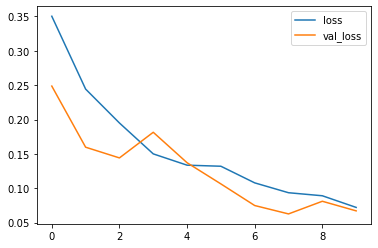

In [54]:
losses[['loss','val_loss']].plot()

In [55]:
model.metrics_names

['loss', 'acc']

In [56]:
model.evaluate_generator(test_image_gen)

[0.05778579966195016, 0.98284733]

In [57]:
from tensorflow.keras.preprocessing import image

In [58]:
pred_probabilities = model.predict_generator(test_image_gen)

In [59]:
pred_probabilities

array([[2.04145908e-05],
       [2.56612897e-03],
       [2.13050842e-03],
       [2.08616257e-07],
       [1.73163682e-01],
       [4.47034836e-07],
       [1.08629465e-04],
       [2.80141830e-06],
       [2.10404396e-05],
       [5.98033726e-01],
       [6.56219065e-01],
       [1.13056511e-01],
       [1.74013972e-02],
       [3.18980217e-03],
       [1.86821789e-01],
       [5.73302507e-02],
       [2.84144282e-03],
       [6.55651093e-04],
       [1.31964684e-04],
       [7.93012142e-01],
       [1.14965439e-03],
       [8.22973549e-02],
       [7.86781311e-06],
       [1.56962872e-03],
       [9.08970833e-05],
       [1.42899454e-02],
       [5.31196594e-04],
       [9.47713852e-06],
       [6.84559345e-04],
       [4.17232513e-07],
       [1.01506710e-04],
       [9.34898853e-04],
       [5.96046448e-08],
       [2.02932954e-03],
       [9.99207497e-02],
       [1.99466944e-04],
       [4.52995300e-06],
       [1.60664320e-04],
       [7.41485715e-01],
       [6.92921877e-03],


In [61]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
predictions = pred_probabilities > 0.5

In [63]:
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       334
           1       0.94      1.00      0.97       249

    accuracy                           0.97       583
   macro avg       0.97      0.97      0.97       583
weighted avg       0.97      0.97      0.97       583



In [66]:
confusion_matrix(test_image_gen.classes,predictions)

array([[318,  16],
       [  1, 248]], dtype=int64)

In [111]:
stick_figure = 'D:\\Pycharm\\Anomalous_detection_CNN\\data\\train\\\\abnormal\\Image412.png'

In [112]:
my_image = image.load_img(stick_figure,target_size=image_shape)

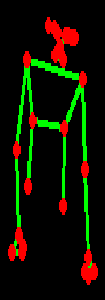

In [113]:
my_image

In [114]:
type(my_image)

PIL.Image.Image

In [115]:
my_image = image.img_to_array(my_image)

In [116]:
type(my_image)

numpy.ndarray

In [117]:
my_image.shape

(300, 105, 3)

In [118]:
my_image = np.expand_dims(my_image, axis=0)

In [119]:
my_image.shape

(1, 300, 105, 3)

In [120]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [110]:
test_image_gen.class_indices

{'abnormal': 0, 'normal': 1}